# WORD2VEC

Neural networks are not great with words, They might work for letters like in my project: [ai_captcha_solver_model](https://github.com/MorrisSimons/ai_captcha_solver_model)

#### What we will do
- turn words into numbers
- Train a model to optimize word prediction on what words are close to each other.



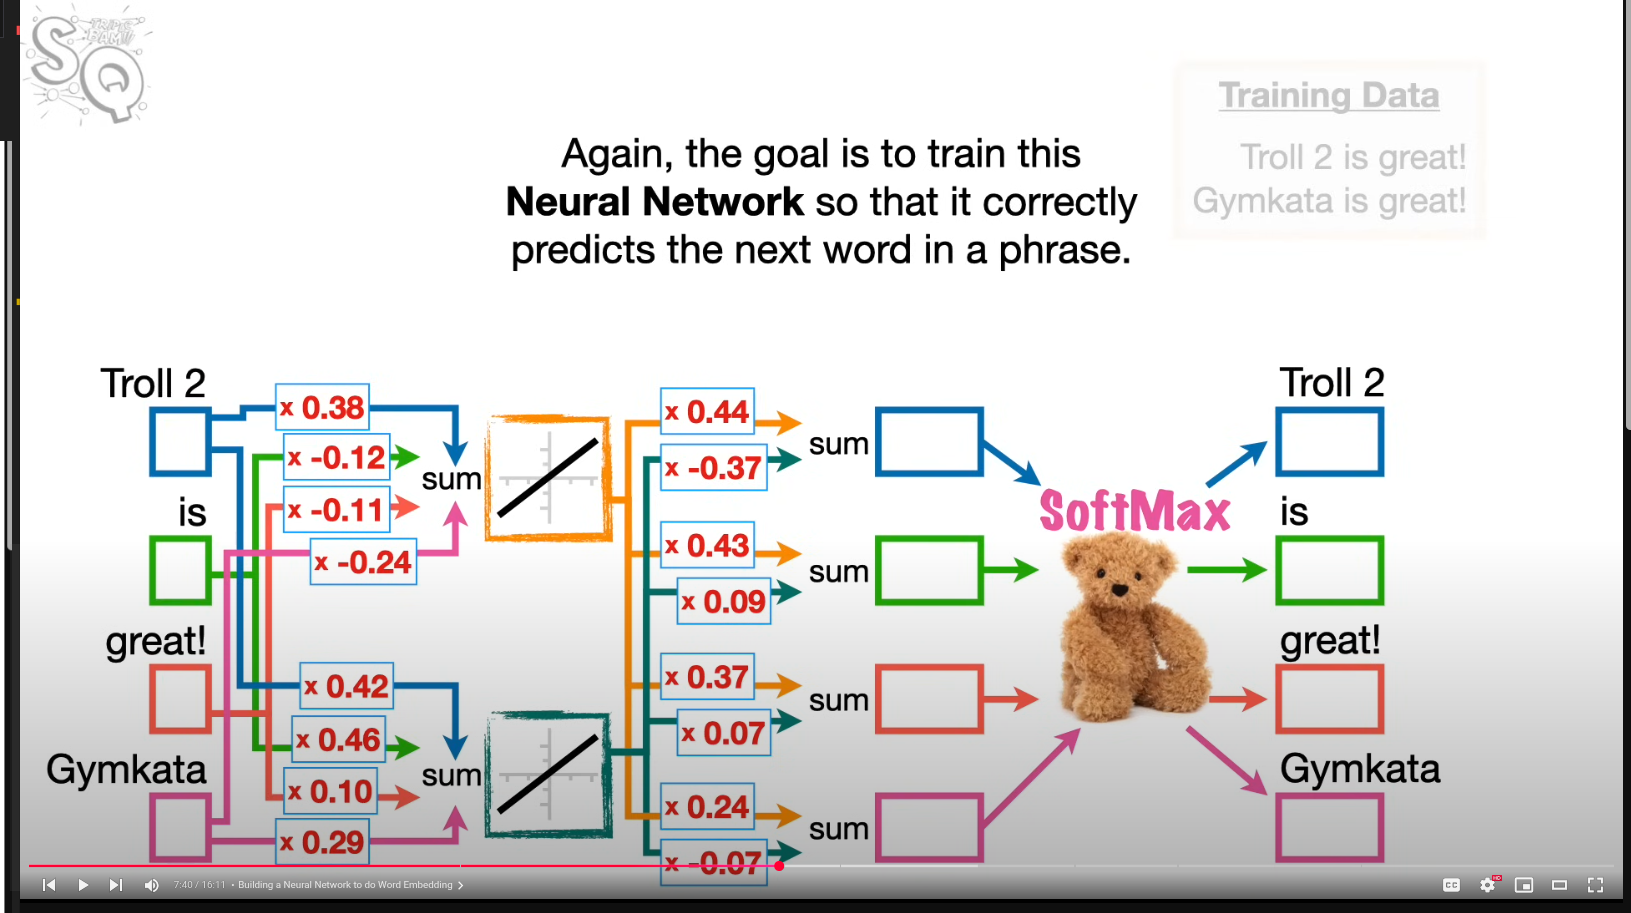

In [1]:
!pip install -q gensim

In [2]:
import numpy as np

### Design decsions
- We can use Continuousus Bag Of Words (Troll 2, and Great!) to predict -> (is) in between.
- skip gram use (is) to predict Troll 2 and Great.
- people often use 100s or more activation function to predict embeddings.


For this we are going to use : bigram model
### Bigram
A bigram model predicts the next word in a sequence based only on the current word, capturing word-to-word relationships. It breaks down text into pairs of consecutive words (bigrams) and learns the probability of each word following another. This approach is simple but effective for modeling short-range dependencies in language. In neural word embeddings, bigram models help train word vectors by optimizing predictions of the next word given the current one.

In [ ]:
sentences = [
    ['troll 2', 'is', 'great', 'gymkarta', 'awesome', 'amazing']
]

# Remove or replace the line below, since 'word' is not in your vocabulary
word = 'great'

# prepare data for next‐word prediction (bigram)
tokens = [w for sent in sentences for w in sent]
vocab = sorted(set(tokens))
word_to_ix = {w: i for i, w in enumerate(vocab)}
ix_to_word = {i: w for w, i in word_to_ix.items()}
V = len(vocab)          # vocab size
N = 100                 # embedding dim
LEARNING_RATE = 1e-9

# initialize weights for W1 and W2 0.01 to make them small but not zero
W1 = np.random.randn(N, V) * 0.01
W2 = np.random.randn(V, N) * 0.01

# lookup most similar words by cosine similarity in W1
def most_similar(word, topn=5):
    idx = word_to_ix[word]
    v = W1[:, idx] 
    norms = np.linalg.norm(W1, axis=0) * np.linalg.norm(v)
    sims = (W1.T.dot(v)) / norms # cosine similarity between the input word vector and all other word vectors
    best = np.argsort(-sims)[1:topn+1]
    return [(ix_to_word[i], sims[i]) for i in best]

# To avoid KeyError, use a word from your vocabulary, e.g. 'great'
print(f"Similar to '{word}':", most_similar(word))



def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

# Create bigram (input, target) pairs for the bigram model
pairs = []
for i in range(len(tokens) - 1):
    input_word = tokens[i]
    target_word = tokens[i + 1]
    pairs.append((input_word, target_word))

# training hyperparams
lr = 0.1
epochs = 500

for epoch in range(epochs):
    loss = 0
    for w_in, w_out in pairs:
        x = np.zeros(V); x[word_to_ix[w_in]] = 1
        # forward
        h = W1.dot(x)
        u = W2.dot(h)
        y = softmax(u)
        loss += -np.log(y[word_to_ix[w_out]] + LEARNING_RATE)
        # backprop
        e = y.copy()
        e[word_to_ix[w_out]] -= 1
        dW2 = np.outer(e, h)
        dW1 = np.outer(W2.T.dot(e), x)
        W2 -= lr * dW2
        W1 -= lr * dW1
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss {loss:.4f}")


# To avoid KeyError, use a word from your vocabulary, e.g. 'great'
print(f"Similar to '{word}':", most_similar(word))

Similar to 'great': [('troll 2', 0.08404310551422702), ('amazing', 0.0010858547058255868), ('awesome', -0.018222888464812837), ('gymkarta', -0.03225723552874708), ('is', -0.04660588954963186)]
Epoch 0, loss 8.9599
Epoch 100, loss 0.0733
Epoch 200, loss 0.0238
Epoch 300, loss 0.0136
Epoch 400, loss 0.0094
Similar to 'great': [('amazing', 0.06626227519564294), ('is', -0.20630320441653804), ('gymkarta', -0.23488444914835563), ('troll 2', -0.2463339654680848), ('awesome', -0.25283422635750563)]


# test 2

### Loading Data


In [ ]:
file = open('Royal_data.txt', 'r')
royal_data = file.readlines()
print(royal_data)
file.close()

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


### Removing '\n' from the end of every sentence and convert the sentence into lowercase

In [ ]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', '')

print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


### Removing stop words


In [ ]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = []
for sent in royal_data:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


### Creating bigrams

In [ ]:
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])
            

print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


### Getting a list of unique words

In [ ]:
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
Total number of unique words are: 12


### Creating dictionary of words

In [ ]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


### Performing one-hot encoding

In [ ]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
    
X = np.array(X)
Y = np.array(Y)

### Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class BigramModel(nn.Module):
    def __init__(self, input_size, embed_size, output_size):
        super(BigramModel, self).__init__()
        self.fc1 = nn.Linear(input_size, embed_size)
        self.fc2 = nn.Linear(embed_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return torch.softmax(x, dim=1)

embed_size = 2
input_size = Y.shape[1]
output_size = Y.shape[1]

model = BigramModel(input_size, embed_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())



In [ ]:
# Save the initial weights of the embedding layer before training
initial_weights = model.fc1.weight.data.numpy().T.copy()  # shape: (input_size, embed_size)

Initial word embeddings (before training):
beautiful: [-1.0803347 -0.9125899]
boy: [ 1.3652598 -0.8753506]
daughter: [-0.06782452  0.14818347]
future: [-1.0130073  1.4910804]
king: [ 1.3322215 -1.0911703]
man: [-0.857844  1.335484]
prince: [-1.2778151  1.2767931]
princess: [-1.0433619 -1.067651 ]
queen: [-1.1371313 -0.8296869]
son: [ 1.1929702 -1.2330987]
strong: [ 1.0447872 -1.0703645]
woman: [0.3482441 0.4565975]


In [ ]:
# Convert X and Y to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(np.argmax(Y, axis=1), dtype=torch.long)  # CrossEntropyLoss expects class indices

epochs = 1000
batch_size = 256

for epoch in range(epochs):
	permutation = torch.randperm(X_tensor.size()[0])
	epoch_loss = 0.0
	for i in range(0, X_tensor.size()[0], batch_size):
		indices = permutation[i:i+batch_size]
		batch_x, batch_y = X_tensor[indices], Y_tensor[indices]

		optimizer.zero_grad()
		outputs = model(batch_x)
		loss = criterion(outputs, batch_y)
		loss.backward()
		optimizer.step()
		epoch_loss += loss.item()
	if (epoch+1) % 100 == 0:
		print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 100, Loss: 2.4871
Epoch 200, Loss: 2.4720
Epoch 300, Loss: 2.4492
Epoch 400, Loss: 2.4143
Epoch 500, Loss: 2.3715
Epoch 600, Loss: 2.3341
Epoch 700, Loss: 2.3024
Epoch 800, Loss: 2.2810
Epoch 900, Loss: 2.2688
Epoch 1000, Loss: 2.2605


In [ ]:
# Get the weights of the first linear layer (embedding layer)
weights = model.fc1.weight.data.numpy().T  # shape: (input_size, embed_size) -> transpose to (embed_size, input_size)

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]

#print(word_embeddings)

### Before training

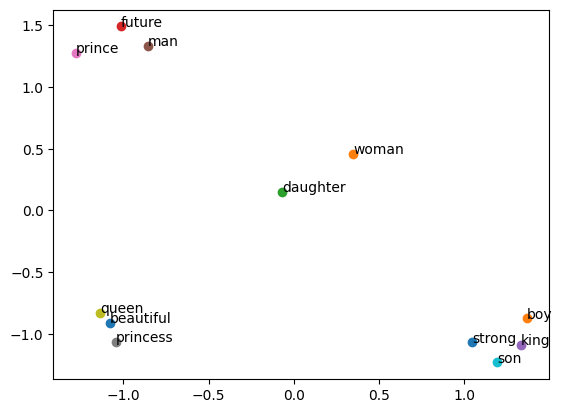

In [ ]:
import matplotlib.pyplot as plt

initial_word_embeddings = {}
for word in all_words:
    initial_word_embeddings[word] = initial_weights[words_dict[word]]

# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = initial_word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('before_training.png')

### After training

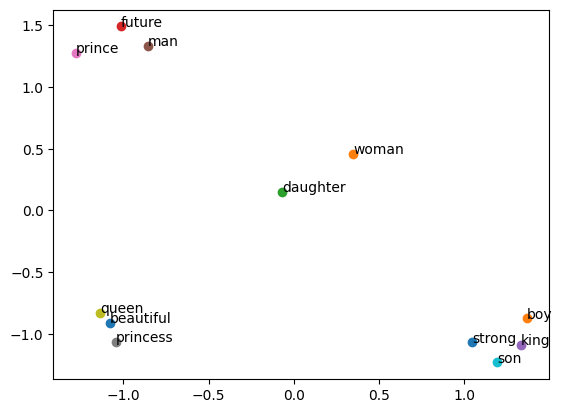

In [ ]:
# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('after_training.jpg')